# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

In [30]:
warnings.filterwarnings('ignore')

In [31]:
flight = pd.read_csv("flight.csv")
flight.head(3)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3


In [32]:
stats = ['min', 'max', 'mean', 'median', 'std']
a = flight.coach_price.aggregate(stats)
for i in range(len(stats)-1):
    print(f'The {stats[i]} coach price is ${int(a[i])}')
print(f'The standard deviation is ${int(a[-1])}')

The min coach price is $44
The max coach price is $593
The mean coach price is $376
The median coach price is $380
The standard deviation is $67


In [33]:
np.percentile(flight.coach_price, [75, 100])

array([426.67625, 593.635  ])

In [34]:
def spreads(series, upper, price):
    b, c = 100, 100-upper
    d = np.percentile(series, [b, c])
    s = f'The upper {b-c}% of the data spreads between {round(d[1])} and {round(d[0])} values.'
    if price < d[0] and price > d[1]:
        s1 = f' The ${price} ticket is IN that range.'
    elif d[0]-d[1] == 0:
        s1 = ' There is no range.'
    elif price < d[1]:
        s1 = f' The ${price} ticket is BELOW that range.'
    else:
        s1 = f' The ${price} ticket is ABOVE that range.'
    return s + s1

In [35]:
spreads(flight.coach_price, 2, 500)

'The upper 2% of the data spreads between 499 and 594 values. The $500 ticket is IN that range.'

In [36]:
flight.describe()

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [37]:
flight['coach_price_long'] = flight.coach_price[flight.hours == 8]
flight['coach_price_medium'] = flight.coach_price[(flight.hours >= 4) & (flight.hours < 8)]
flight['coach_price_short'] = flight.coach_price[flight.hours < 4]

In [38]:
flight.head(3)

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours,coach_price_long,coach_price_medium,coach_price_short
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1,NaN,NaN,338.82
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6,NaN,472.655,NaN
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3,NaN,NaN,351.96


In [39]:
journey = list(flight.columns)[-3:]
journey

['coach_price_long', 'coach_price_medium', 'coach_price_short']

In [40]:
len(flight['coach_price_long']) - flight['coach_price_long'].isna().sum()

2634

In [41]:
len(flight[~flight['coach_price_long'].isna()])

2634

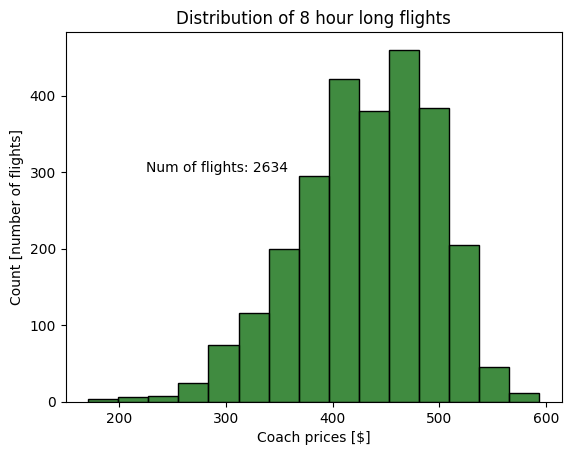

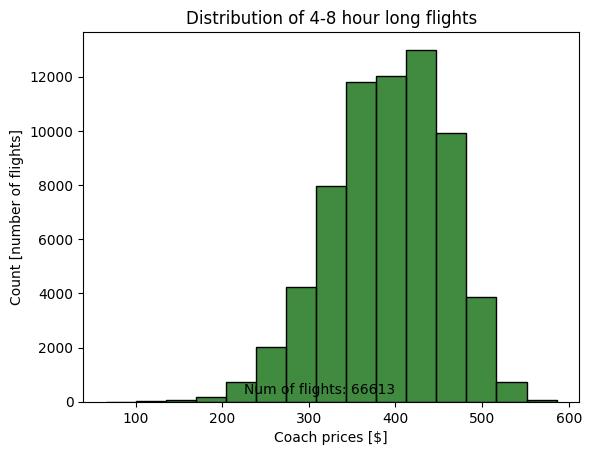

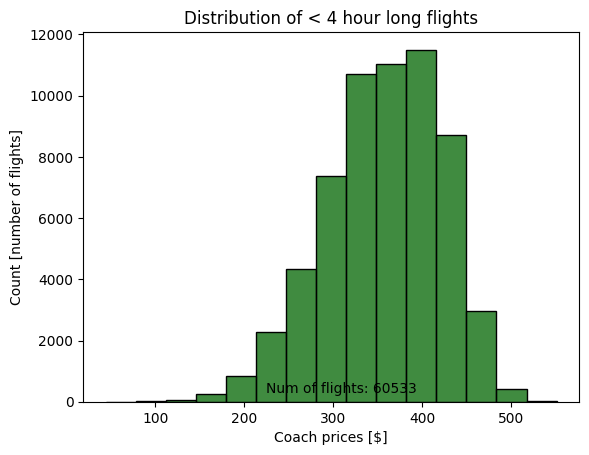

<Figure size 640x480 with 0 Axes>

In [42]:
for cat in journey:
    sns.histplot(x=cat, data=flight, color='darkgreen', bins=15)
    total = len(flight[cat]) - flight[cat].isna().sum()
    flight_hours = '8' if cat == 'coach_price_long' else '4-8' if cat == 'coach_price_medium' else '< 4'
    plt.title(f'Distribution of {flight_hours} hour long flights')
    plt.text(x=225, y=300, s=f'Num of flights: {total}')
    plt.xlabel('Coach prices [$]')
    plt.ylabel('Count [number of flights]')
    plt.show()
    plt.clf()

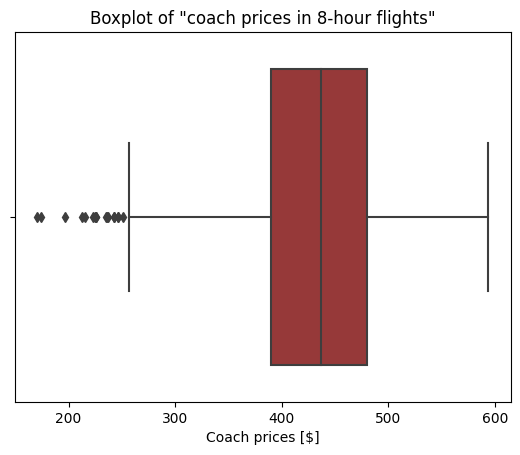

<Figure size 640x480 with 0 Axes>

In [43]:
sns.boxplot(x='coach_price_long', data=flight, color='brown')
plt.title('Boxplot of "coach prices in 8-hour flights"')
plt.xlabel('Coach prices [$]')
plt.show()
plt.clf()

In [44]:
flight.coach_price_long.isna().sum(), flight.coach_price_long.isna().value_counts().loc[True]

(127146, 127146)

In [74]:
flight_long = flight.coach_price_long.dropna().reset_index()
len(flight_long)

2634

In [46]:
flight_long.drop(['index'], axis=1, inplace=True)

In [47]:
flight_long.head(2)

,coach_price_long
0,416.32
1,474.35


In [48]:
#Check the boxplot, we can make boxplot and histplot with Nan values, dropna is needless if we want to calculate

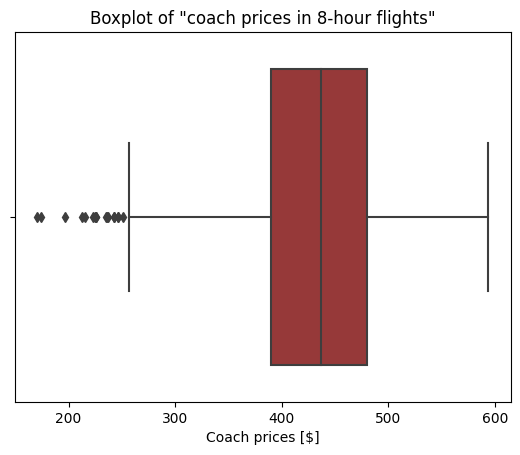

<Figure size 640x480 with 0 Axes>

In [49]:
sns.boxplot(x='coach_price_long', data=flight_long, color='brown')
plt.title('Boxplot of "coach prices in 8-hour flights"')
plt.xlabel('Coach prices [$]')
plt.show()
plt.clf()

In [50]:
np.min(flight_long.coach_price_long)

170.77

In [51]:
f'{spreads(flight.coach_price, 2, 500)} It seems we have an outlier.'

'The upper 2% of the data spreads between 499 and 594 values. The $500 ticket is IN that range. It seems we have an outlier.'

In [52]:
f'{spreads(flight_long.coach_price_long, 14, 500)} Now (long journey) this price seems reasonable.'

'The upper 14% of the data spreads between 501 and 594 values. The $500 ticket is BELOW that range. Now (long journey) this price seems reasonable.'

In [53]:
np.percentile(flight_long.coach_price_long, [75,86])

array([480.04375, 500.6704 ])

In [54]:
print('The $500 ticket price is more reasonable for an 8 hour-long-flight, because it is in the middle of the fourth quantile.')


The $500 ticket price is more reasonable for an 8 hour-long-flight, because it is in the middle of the fourth quantile.


3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [55]:
print(flight.delay.unique())

[   0    9   12    5   13    6   11   10    8   17   14    7    3   16
   15    4    2   18   40   20   32   31   26   21   37   27   24   29
   28   19   22   33   43   34   23   30   35   44   38   39   25   42
   45   36   47   41   46    1   50   48   51   49   54   53   58   52
 1515 1484 1498 1519 1446 1506 1473 1509 1560 1488 1512 1503 1500 1496
 1476 1536 1524 1497 1468 1532 1479 1489 1493 1495 1518 1525 1513 1522
 1494 1504 1462 1510 1492 1501 1499 1521 1508 1480 1482 1472 1491 1514
 1507 1459 1467 1528 1469 1475 1533 1477 1483 1487 1530 1481 1490]


In [56]:
big_delays = flight.delay[flight.delay > 58]

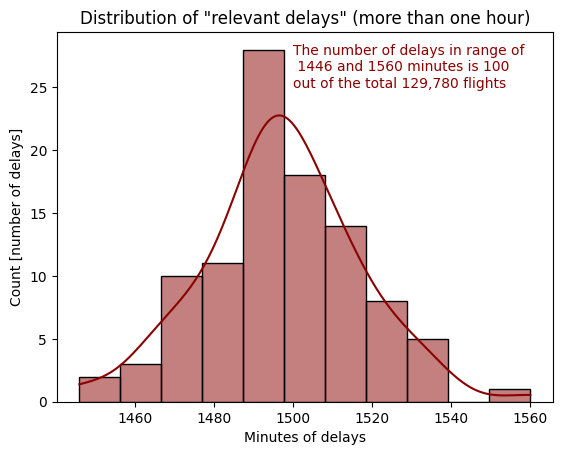

<Figure size 640x480 with 0 Axes>

In [57]:
big_delays = flight.delay[flight.delay > 58]
sns.histplot(big_delays, kde=True, bins=11, color='darkred')
plt.title('Distribution of "relevant delays" (more than one hour)')
plt.xlabel('Minutes of delays')
plt.ylabel('Count [number of delays]')
plt.text(x= 1500, y= 25, s=f'''The number of delays in range of \n {np.min(big_delays)} and {np.max(big_delays)} minutes is {len(big_delays)}
out of the total {len(flight.delay):,} flights''', color='darkred')
plt.show()
plt.clf()

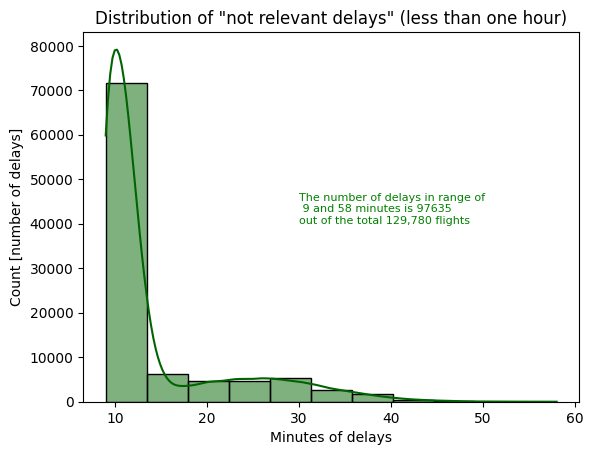

<Figure size 640x480 with 0 Axes>

In [58]:
small_delays = flight.delay[(flight.delay >= 9) & (flight.delay <= 58)]
sns.histplot(small_delays, kde=True, bins=11, color='darkgreen')
plt.title('Distribution of "not relevant delays" (less than one hour)')
plt.xlabel('Minutes of delays')
plt.ylabel('Count [number of delays]')
plt.text(x= 30, y= 40000, s=f'''The number of delays in range of \n {np.min(small_delays)} and {np.max(small_delays)} minutes is {len(small_delays)}
out of the total {len(flight.delay):,} flights''', fontsize=8, color='green')
plt.show()
plt.clf()

In [59]:
print(f'''You can see that more than "70%" of the flights had delays but not relevant (less than 1 hour) and less than "0.1%" of the total flights
had relevant delays, meaning circa 24-26 hours. It also means that almost "30%" of the flights had no delays at all, more precisely the number of 
delays having less than 9 minutes is {flight.delay[flight.delay < 9].count()} out of {len(flight.coach_price)} flights.''')

You can see that more than "70%" of the flights had delays but not relevant (less than 1 hour) and less than "0.1%" of the total flights
had relevant delays, meaning circa 24-26 hours. It also means that almost "30%" of the flights had no delays at all, more precisely the number of 
delays having less than 9 minutes is 32045 out of 129780 flights.


## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

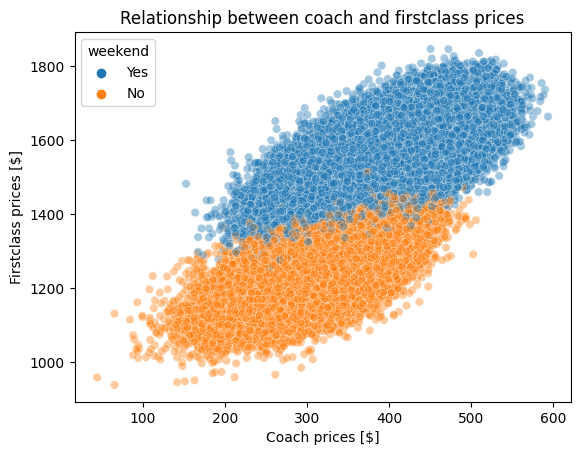

<Figure size 640x480 with 0 Axes>

In [60]:
sns.scatterplot(x='coach_price', y='firstclass_price', data=flight, hue='weekend', alpha=0.4)
plt.title('Relationship between coach and firstclass prices')
plt.xlabel('Coach prices [$]')
plt.ylabel('Firstclass prices [$]')
plt.show()
plt.clf()

In [61]:
print('''The scatterplot shows not just that higher coach prices have higher firstclass prices, which means there is a positive 
correlation between them, but it is absolutely sure, that flying on weekdays is much cheaper than at weekends.''')

The scatterplot shows not just that higher coach prices have higher firstclass prices, which means there is a positive 
correlation between them, but it is absolutely sure, that flying on weekdays is much cheaper than at weekends.


5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

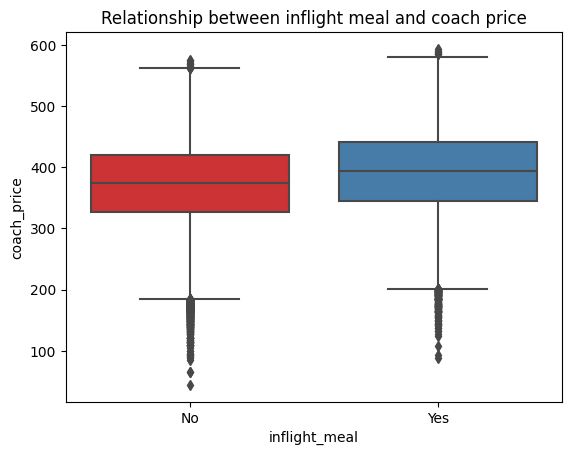

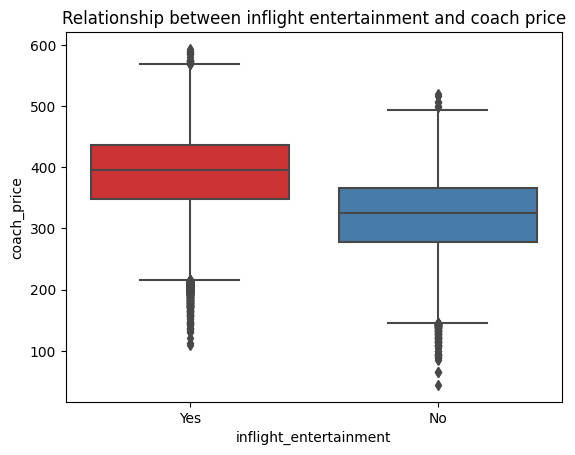

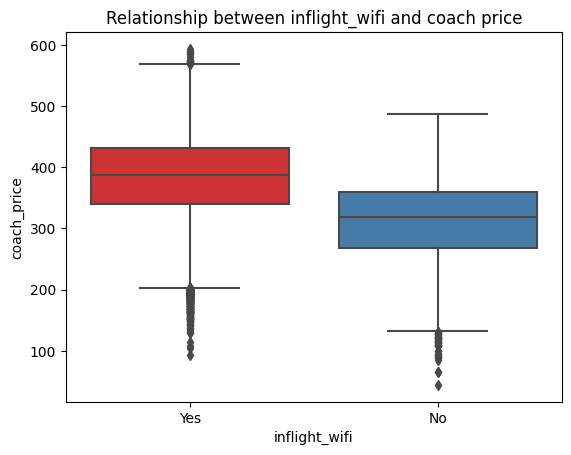

<Figure size 640x480 with 0 Axes>

In [62]:
sns.boxplot(x='inflight_meal', y='coach_price', data=flight, palette='Set1')
plt.title('Relationship between inflight meal and coach price')
plt.show()
plt.clf()
sns.boxplot(x='inflight_entertainment', y='coach_price', data=flight, palette='Set1')
plt.title('Relationship between inflight entertainment and coach price')
plt.show()
plt.clf()
sns.boxplot(x='inflight_wifi', y='coach_price', data=flight, palette='Set1')
plt.title('Relationship between inflight_wifi and coach price')
plt.show()
plt.clf()

In [63]:
inflight_services = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

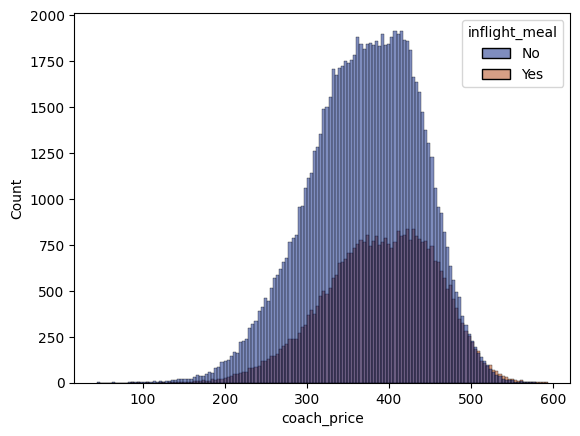

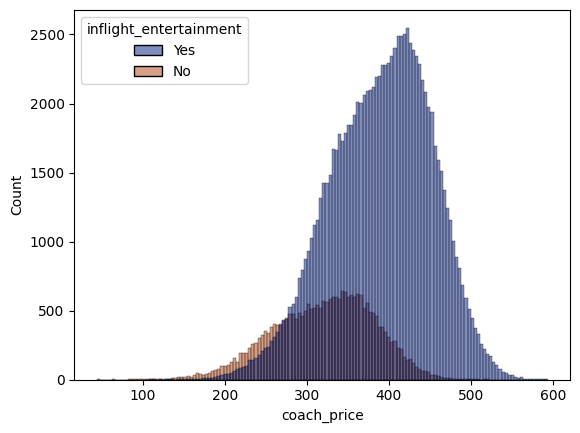

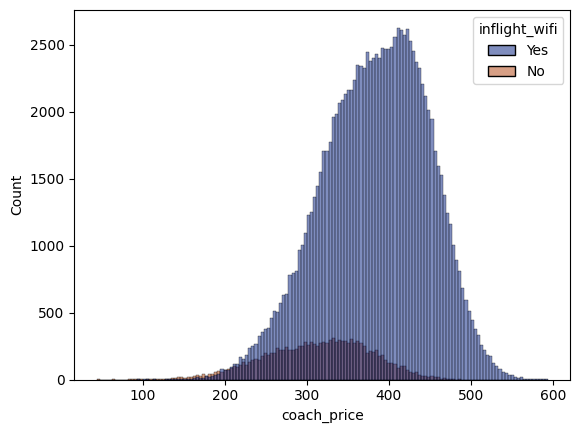

<Figure size 640x480 with 0 Axes>

In [64]:
for serv in inflight_services:
    sns.histplot(x='coach_price', data = flight, hue=serv, palette='dark')
    plt.show()
    plt.clf()

In [65]:
print('''Meal does not have much effect on coach prices, but wifi has little and entertainment is the most influential among them. On the other
hand you can see that people are more likely buy a ticket for a flight if that has wifi and/or entertainment, and no meals are preferable.''')

Meal does not have much effect on coach prices, but wifi has little and entertainment is the most influential among them. On the other
hand you can see that people are more likely buy a ticket for a flight if that has wifi and/or entertainment, and no meals are preferable.


6. How does the number of passengers change in relation to the length of flights?

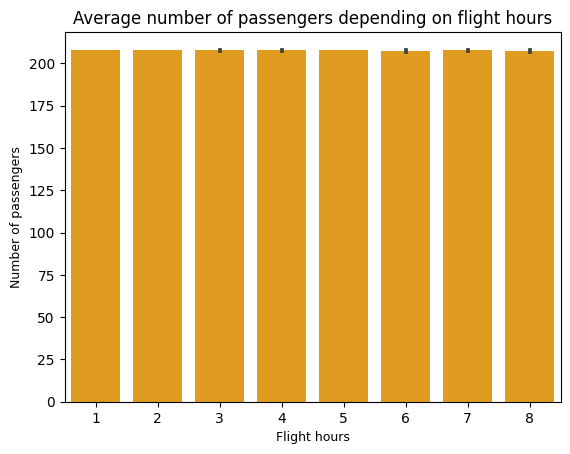

<Figure size 640x480 with 0 Axes>

In [66]:
sns.barplot(x='hours', y='passengers', data=flight, color='orange')
plt.title('Average number of passengers depending on flight hours')
plt.xlabel('Flight hours', fontsize=9)
plt.ylabel('Number of passengers', fontsize=9)
plt.show()
plt.clf()

In [67]:
model = sm.OLS.from_formula('firstclass_price ~ coach_price', data=flight).fit()
pred_400 = model.params[0] + model.params[1]*400
a = 700
data = {'coach_price':[a]}
pred_700 = model.predict(data)
print(f'If the coach price will exceed the ${a} level, the predicted firstclass price will reach ${int(round(pred_700[0], 3))}.')

If the coach price will exceed the $700 level, the predicted firstclass price will reach $2043.


In [68]:
model.params

Intercept      769.146468
coach_price      1.821063
dtype: float64

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       firstclass_price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                 1.761e+05
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        20:32:48   Log-Likelihood:            -7.8926e+05
No. Observations:              129780   AIC:                         1.579e+06
Df Residuals:                  129778   BIC:                         1.579e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     769.1465      1.660    463.210      0.000     765.892     772.401
coach_price     1.8211      0.004    419.636      0.000       1.813       1.830
==============================================================================
Omnibus:                      874.431   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.107
Skew:                          -0.111   Prob(JB):                    6.34e-155
Kurtosis:                       2.713   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
fitted_values = model.predict(flight)
residuals = flight.firstclass_price - fitted_values

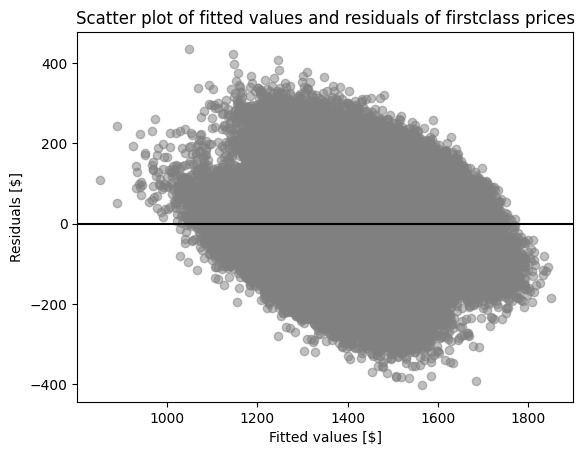

<Figure size 640x480 with 0 Axes>

In [71]:
plt.scatter(fitted_values, residuals, color='gray', alpha=0.5)
plt.title('Scatter plot of fitted values and residuals of firstclass prices')
plt.xlabel('Fitted values [$]')
plt.ylabel('Residuals [$]')
plt.axhline(0, color='black')
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

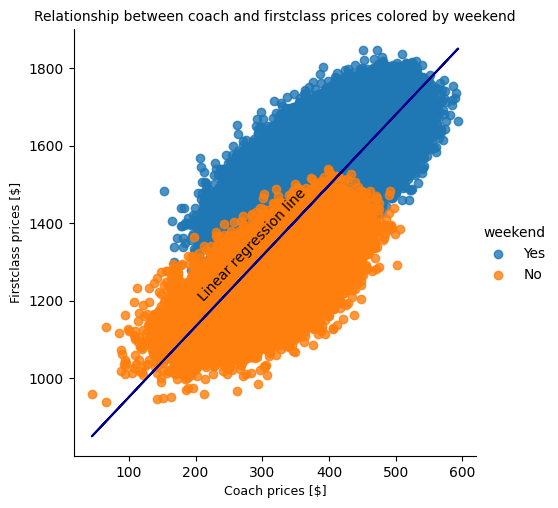

<Figure size 640x480 with 0 Axes>

In [72]:
sns.lmplot(x='coach_price', y='firstclass_price', data=flight, hue='weekend', fit_reg=False)
plt.title('Relationship between coach and firstclass prices colored by weekend', fontsize=10)
plt.xlabel('Coach prices [$]', fontsize=9)
plt.ylabel('Firstclass prices [$]', fontsize=9)
plt.plot(flight.coach_price, fitted_values, color='darkblue')
plt.text(x=200, y=1200, s='Linear regression line', rotation=46.5)
plt.show()
plt.clf()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

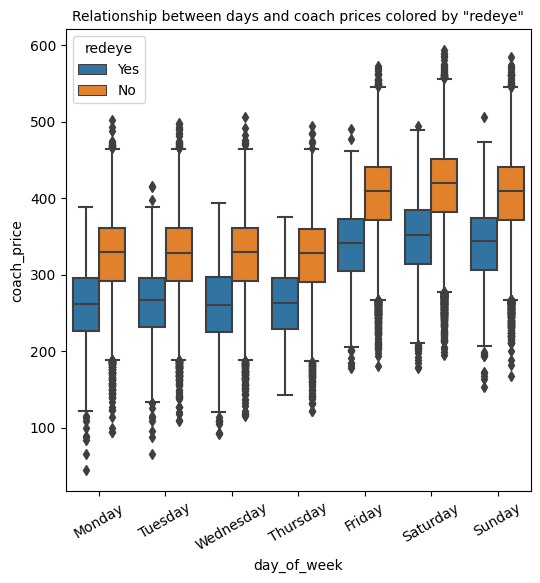

<Figure size 640x480 with 0 Axes>

In [73]:
plt.figure(figsize=[6,6])
sns.boxplot(x='day_of_week', y='coach_price', data=flight, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], hue='redeye')
plt.title('Relationship between days and coach prices colored by "redeye"', fontsize=10)
plt.xticks(rotation=30)
plt.show()
plt.clf()